# **IRIS FLOWER CLASSIFICATION**

# Import necessary libraries

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Load the dataset from the provided path
file_path = r"D:\Afame Technologies\IRIS Flower.csv"
df = pd.read_csv(file_path)

In [7]:
# Display the first few rows of the dataset
print(df.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [9]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [11]:
# Get summary statistics for numerical features
print(df.describe())

       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [13]:
# Check for missing values
print(df.isnull().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


In [15]:
# Check the distribution of the target variable (species)
print(df['species'].value_counts())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64


# Data Visualizations

# 1. Histogram of each feature

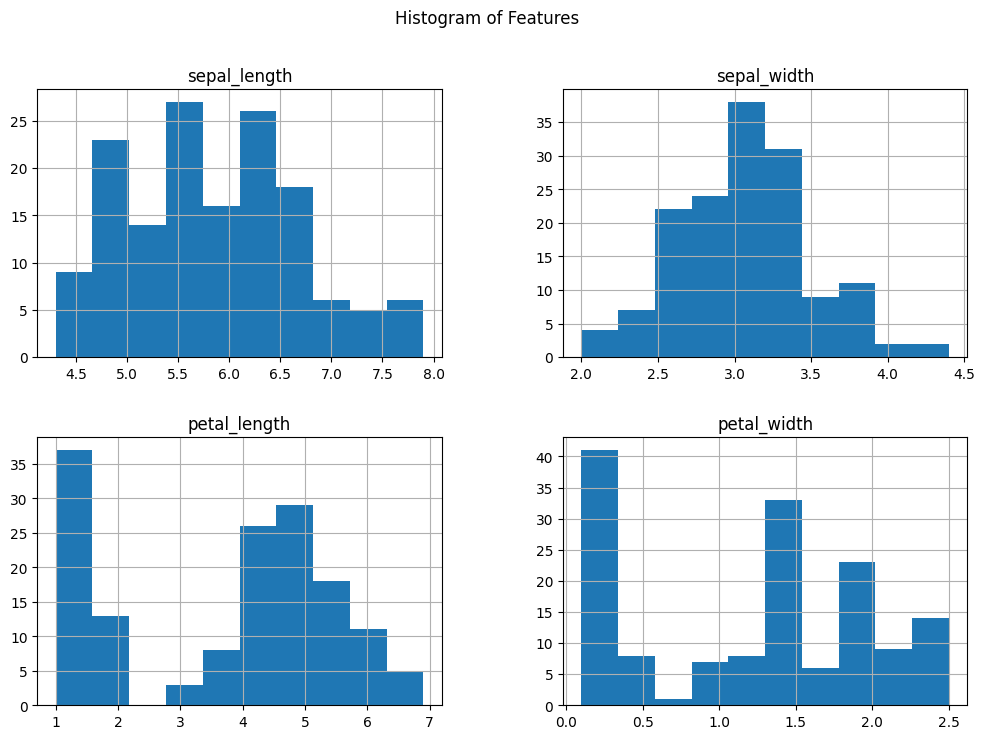

In [44]:

df.drop(columns='species').hist(bins=10, figsize=(12, 8))
plt.suptitle('Histogram of Features')
plt.show()

# 2. Boxplot for each feature grouped by species

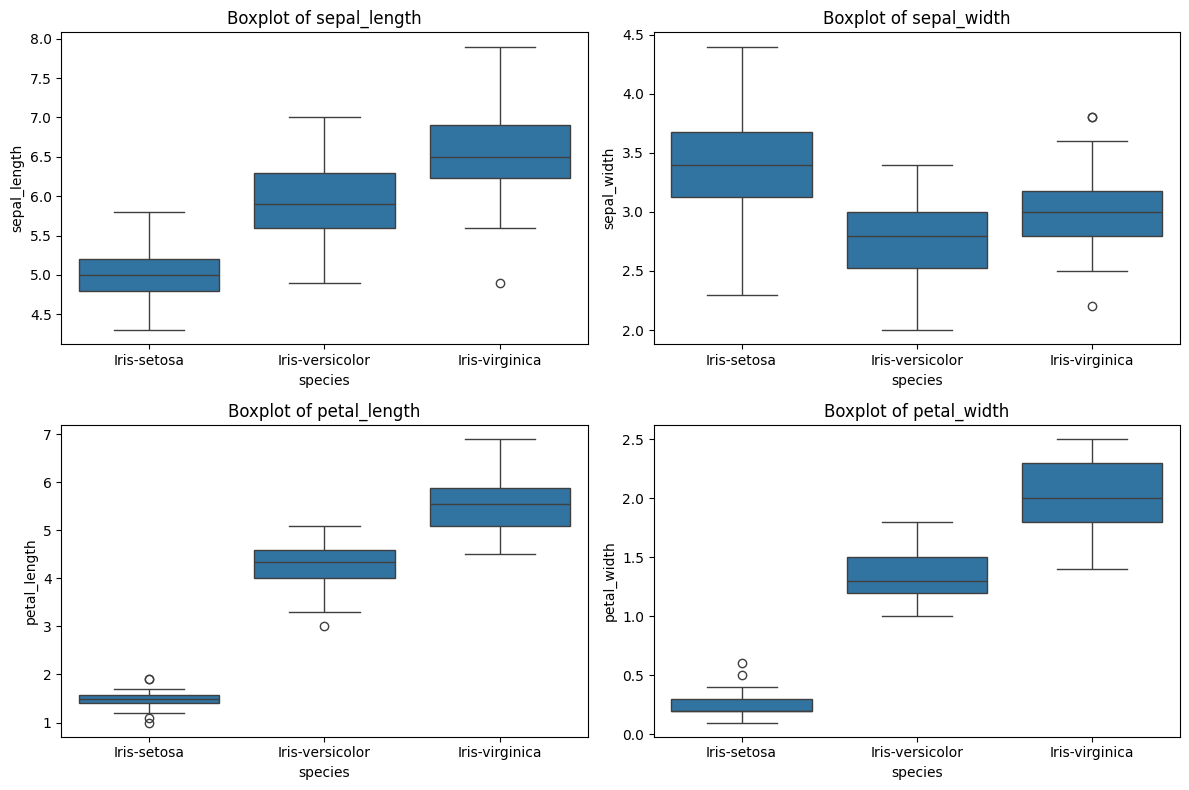

In [47]:

plt.figure(figsize=(12, 8))
for i, feature in enumerate(df.drop(columns='species').columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=df)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

# 3. Pairplot to visualize pairwise relationships

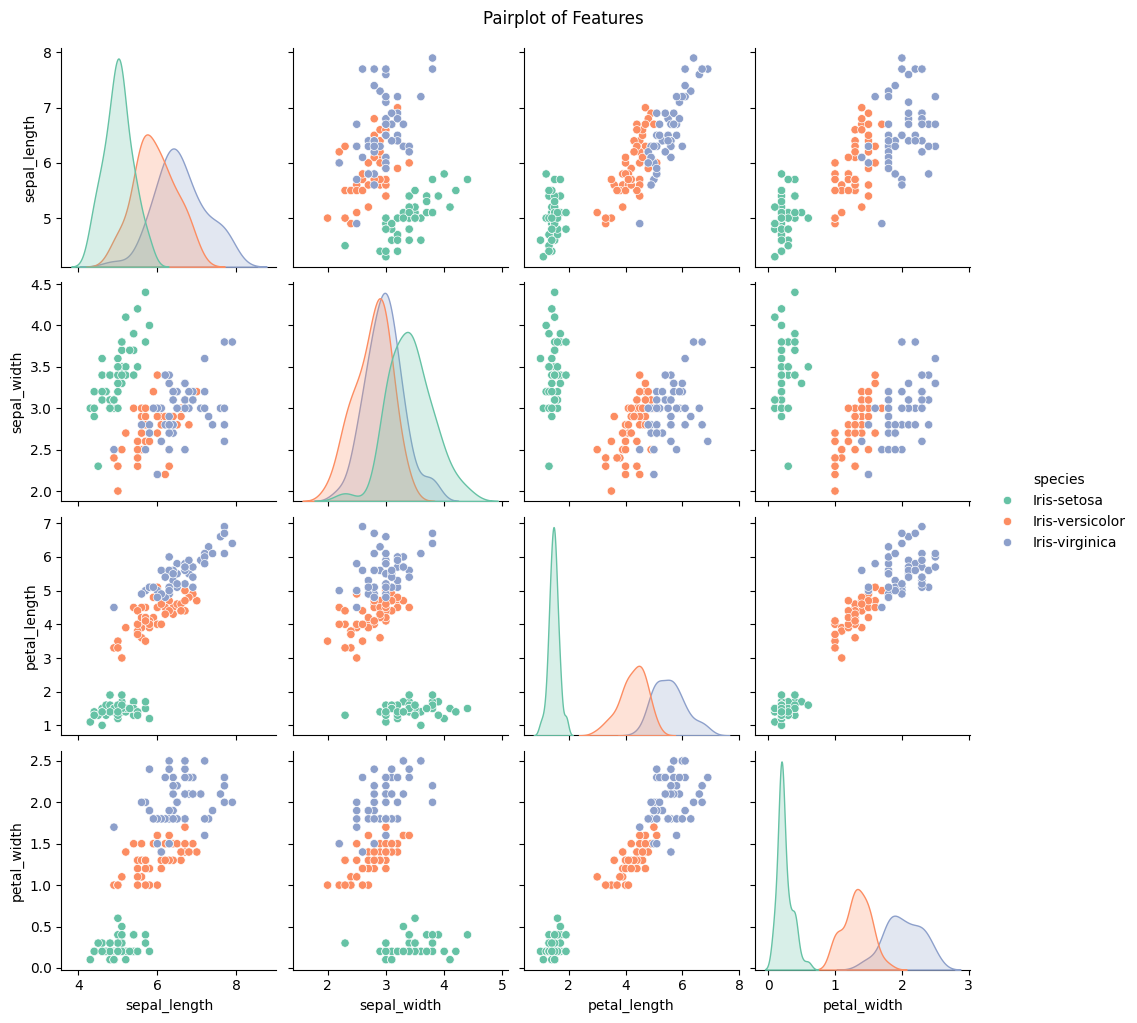

In [50]:

sns.pairplot(df, hue='species', palette='Set2')
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

# 4. Correlation Heatmap

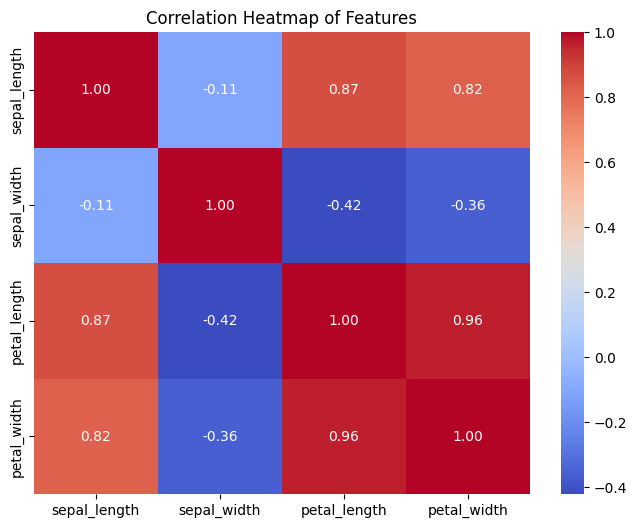

In [53]:

corr = df.drop(columns='species').corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap of Features')
plt.show()

# Separate the features and target variable

In [27]:
X = df.drop(columns='species')  
y = df['species']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [41]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#  K-Nearest Neighbors (KNN) classifier

In [33]:
# Initialize and train a K-Nearest Neighbors (KNN) classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [35]:
# Make predictions on the test set
y_pred = knn.predict(X_test)

In [37]:
# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.0
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
